# plotters.py Visual Tests

In [1]:
# Make parent directory visible for relative imports
from pathlib import Path
import sys  

parent_dir = str(Path().resolve().parents[0])

sys.path.insert(0, parent_dir)

In [2]:
from hicdash.constants import *
from hicdash.definitions import *
from hicdash.plotters import *

## Load Example Data

Note: example data is not included in this repository (but can be derived from public datasets). 

In [3]:
example = ArimaPipelineSample(
    id="K562",
    hic_path="./example_data/K562_inter_30.hic",
    qc_path="./example_data/K562_v1.3_Arima_QC_deep.txt",
    breakpoints_path="./example_data/K562_curated_breakpoints.bedpe",
)

control = ArimaPipelineSample(
    id="GM12878",
    hic_path="./example_data/GM12878_inter_30.hic",
    qc_path=None,
    breakpoints_path=None,
)

# Tests

## plot_hic_region_matrix

In [4]:
regionX = GenomicRegion("chr9", 128000000, 132000000)
regionY = GenomicRegion("chr22", 21000000, 25000000)

Standard plot:

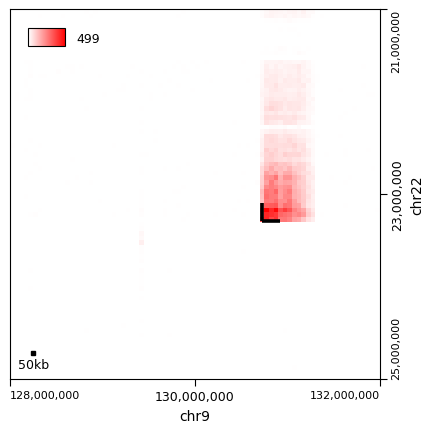

In [5]:
res = 50000
plot_hic_region_matrix(
    example,
    regionX.get_bin_aligned(res),
    regionY.get_bin_aligned(res),
    resolution=res,
    measure="observed",
    aspect="equal",
)

Swap axes:

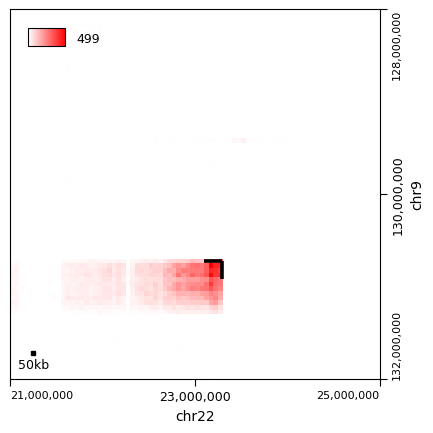

In [6]:
res = 50000
plot_hic_region_matrix(
    example,
    regionY.get_bin_aligned(res),
    regionX.get_bin_aligned(res),
    resolution=res,
    measure="observed",
    aspect="equal",
)

Change resolution:

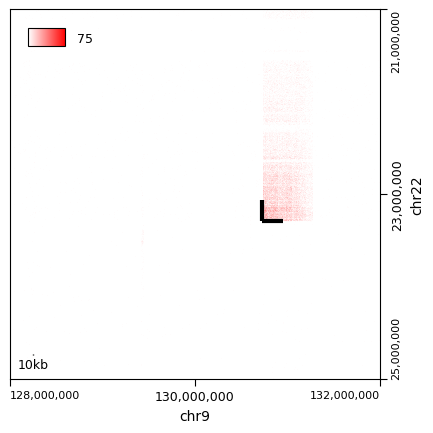

In [7]:
res = 10000
plot_hic_region_matrix(
    example,
    regionX.get_bin_aligned(res),
    regionY.get_bin_aligned(res),
    resolution=res,
    measure="observed",
    aspect="equal"
)

## plot_hic_chr_context

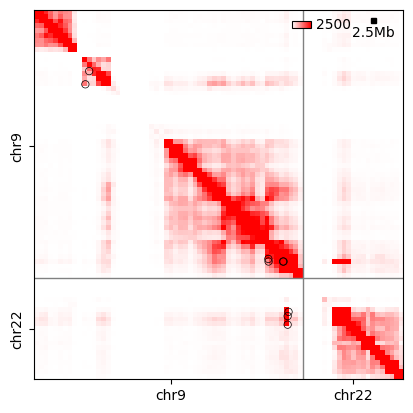

In [8]:
plot_hic_chr_context(
    example, 
    "chr9", 
    "chr22",
    aspect="equal",
    vmax=2500
)

## plot_full_matrix

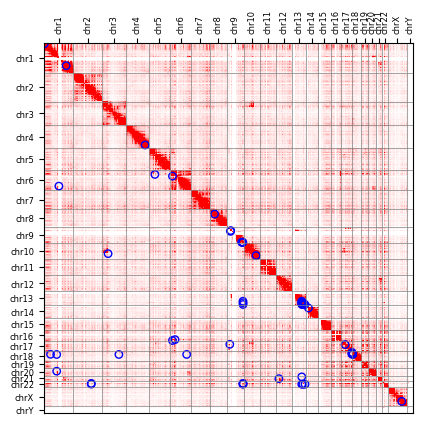

In [9]:
plot_full_matrix(example, show_breakpoints=True)

## Tracks

In [10]:
regionX = GenomicRegion("chr9", 130000000, 131000000)
regionY = GenomicRegion("chr22", 23000000, 24000000)

### plot_gene_track

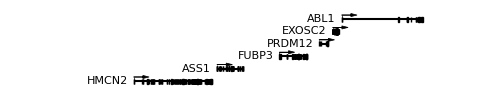

In [11]:
fig, ax = plt.subplots(figsize=(6, 1))
plot_gene_track(regionX)

Gene filter:

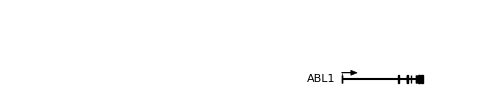

In [12]:
fig, ax = plt.subplots(figsize=(6, 1))
plot_gene_track(regionX, gene_filter=["BCR", "ABL1"])

Highlighted genes:

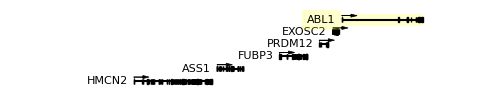

In [13]:
fig, ax = plt.subplots(figsize=(6, 1))
plot_gene_track(regionX, highlight_genes=["BCR", "ABL1"])

All same line:

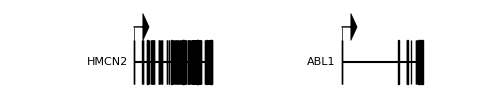

In [14]:
fig, ax = plt.subplots(figsize=(6, 1))
plot_gene_track(regionX, gene_filter=["HMCN2", "ABL1"], all_same_line=True) 

Vertical

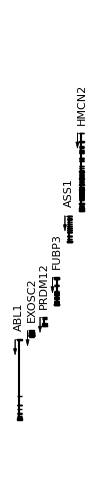

In [15]:
fig, ax = plt.subplots(figsize=(1, 6))
plot_gene_track(regionX, vertical=True) 

### plot_coverage_track

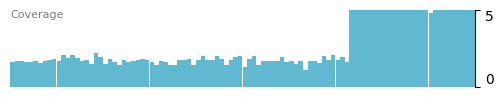

In [16]:
fig, ax = plt.subplots(figsize=(6,1))
resolution = 10000
plot_coverage_track(example, regionX, resolution, label_right=True)

Vertical:

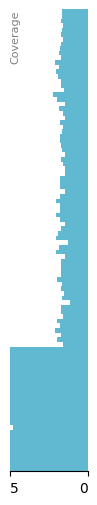

In [17]:
fig, ax = plt.subplots(figsize=(1, 6))
resolution = 10000
plot_coverage_track(example, regionX, resolution, vertical=True)

### plot_bigwig_track


TODO

### plot_arrow_track

TODO

### plot_ctcf_track

TODO

### plot_cnv_track

<Axes: ylabel='$\\log_2$(CN)'>

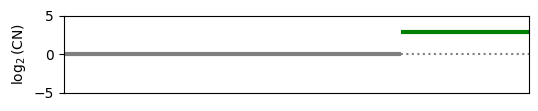

In [18]:
cnv_profile_path = "example_data/K562_CNV_profile_25000.bedgraph"
cnv_segment_path = "example_data/K562_CNV_segment_25000.bedgraph"

fig, ax = plt.subplots(figsize=(6, 1))
plot_cnv_track(
    cnv_profile_path, 
    cnv_segment_path, 
    chr=regionX.chrom, 
    locus_lim=(regionX.start, regionX.end), 
    show_zero_line=True,
    cnv_lim=(-5, 5)
)

<Axes: ylabel='$\\log_2$(CN)'>

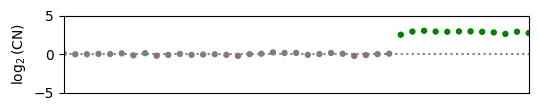

In [19]:
fig, ax = plt.subplots(figsize=(6, 1))
plot_cnv_track(
    cnv_profile_path, 
    cnv_segment_path, 
    chr=regionX.chrom, 
    locus_lim=(regionX.start, regionX.end), 
    plot_scatter=True,
    plot_segments=False,
    dot_size=50,
    dot_alpha=1,
    show_zero_line=True,
    cnv_lim=(-5, 5)
)

## plot_assembled_triangle

In [20]:
selected_bpoint = None
for bpoint in example.breakpoints:
    possible_fusions = bpoint.get_possible_gene_fusions()
    if len(possible_fusions) > 0:
        fusion = possible_fusions[0]
        if fusion[0].gene_name in {"BCR", "ABL1"}:
            selected_bpoint = bpoint
            break

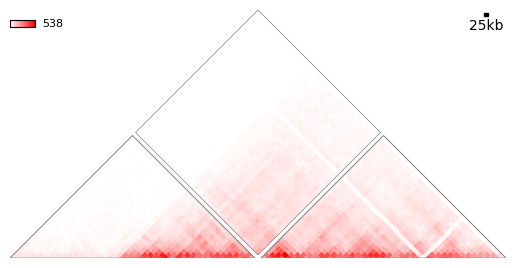

In [21]:
res = 25000
assembly = selected_bpoint.get_assembly(radius=1000000, bin_align_res=res)
assembled = example.get_assembled_hic(assembly, resolution=res, gap_size=1, gap_value=0)

plot_assembled_triangle(assembled, res)

## plot_qc

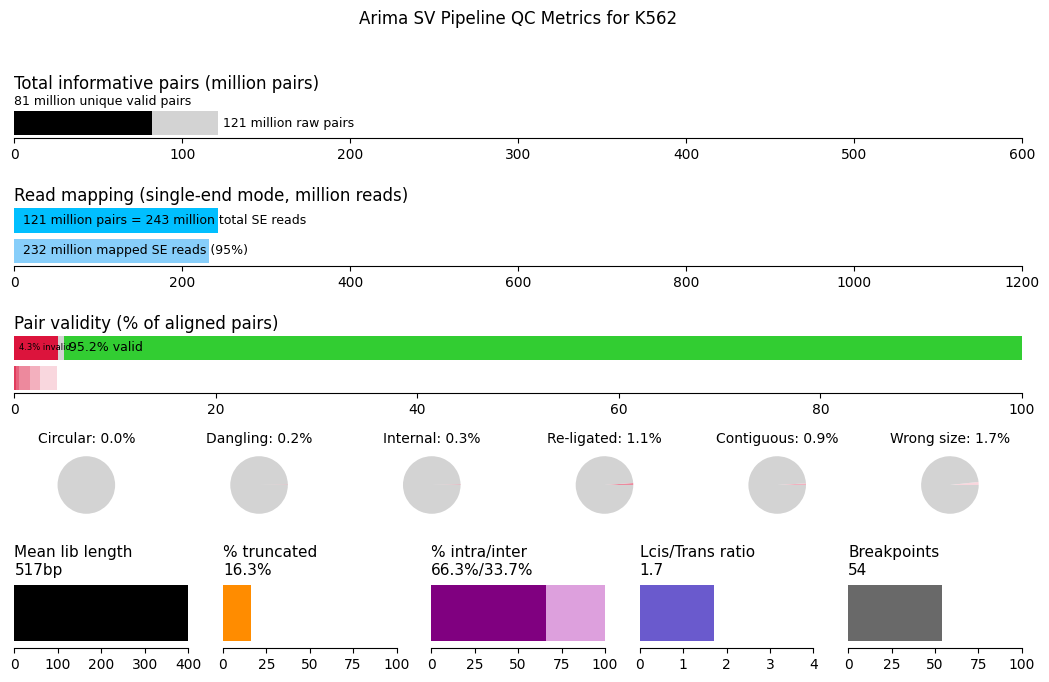

In [22]:
fig = plot_qc(example)

## plot_composite_context_and_zoom

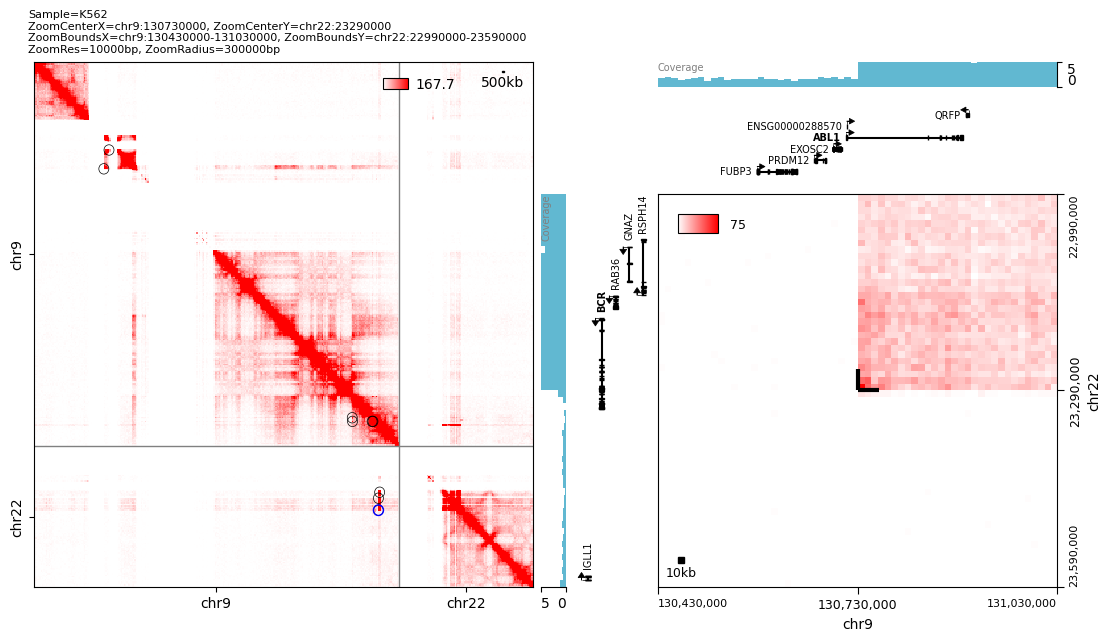

In [23]:
fig = plot_composite_context_and_zoom(example, selected_bpoint)

## plot_composite_multires_breakpoint

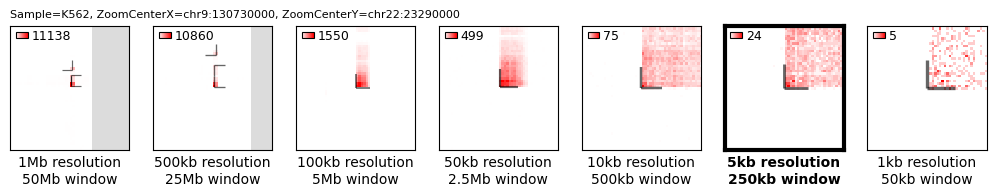

In [24]:
fig = plot_composite_multires_breakpoint(example, selected_bpoint)

## plot_composite_compare_two

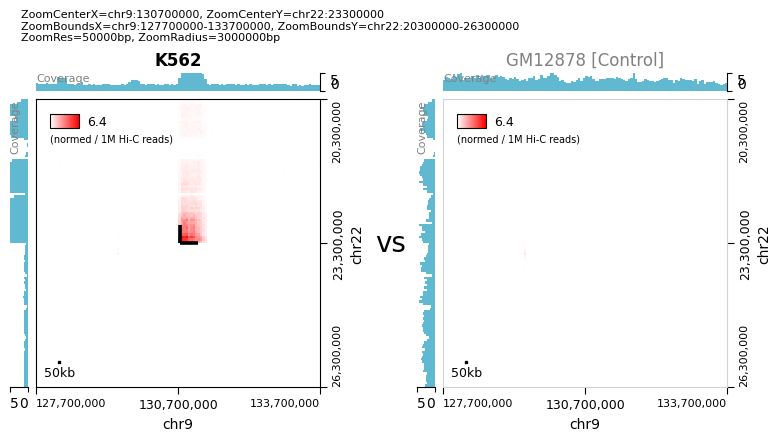

In [25]:
fig = plot_composite_compare_two(example, control, selected_bpoint)

## plot_composite_triangle

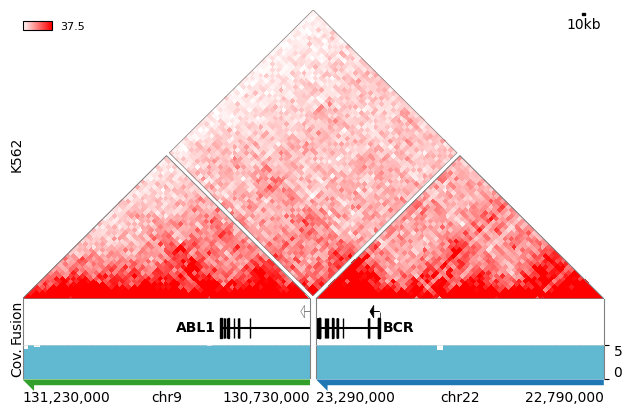

In [26]:
fig = plot_composite_triangle(example, selected_bpoint)